In [1]:
from pathlib import Path

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = Path('../data')
results = Path('../results')

In [4]:
label = pd.read_csv(str(data.joinpath('test-label.csv'))).values[:, -1]
pred = pd.read_csv(str(results.joinpath('prediction.csv'))).values[:, -1]

In [5]:
x_range = np.arange(np.size(label, 0))

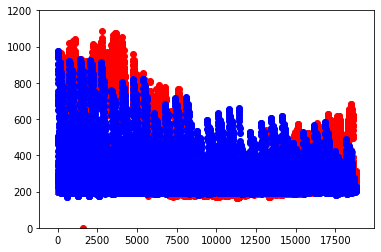

In [6]:
plt.ylim(0, 1200)
plt.scatter(x_range, label, c='r')
plt.scatter(x_range, pred, c='b')

In [7]:
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred, epsilon=1e-0):
    diff = np.abs((y_true - y_pred) / np.clip(np.abs(y_true), epsilon, None))
    return 100. * np.mean(diff)

In [8]:
mean_absolute_percentage_error(label, pred)

18.611463239708186